Diabetes Prediction using Python and concerning libraries

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

In [23]:
# Load the dataset (Using the Pima Indians Diabetes dataset)
url = '/content/diabetes.csv'
#names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data = pd.read_csv(url)

In [24]:
# Separate features and target variable
X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [25]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
# Reshape data for CNN input (add 3rd dimension)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [28]:
# Define the CNN model
model = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [29]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [30]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
20/20 [==============================] - 2s 15ms/step - loss: 0.6589 - accuracy: 0.6564 - val_loss: 0.6208 - val_accuracy: 0.6753
Epoch 2/20
20/20 [==============================] - 0s 6ms/step - loss: 0.6093 - accuracy: 0.7036 - val_loss: 0.5755 - val_accuracy: 0.7532
Epoch 3/20
20/20 [==============================] - 0s 6ms/step - loss: 0.5747 - accuracy: 0.7134 - val_loss: 0.5417 - val_accuracy: 0.7727
Epoch 4/20
20/20 [==============================] - 0s 5ms/step - loss: 0.5488 - accuracy: 0.7313 - val_loss: 0.5201 - val_accuracy: 0.7727
Epoch 5/20
20/20 [==============================] - 0s 5ms/step - loss: 0.5303 - accuracy: 0.7394 - val_loss: 0.5041 - val_accuracy: 0.7792
Epoch 6/20
20/20 [==============================] - 0s 6ms/step - loss: 0.5126 - accuracy: 0.7410 - val_loss: 0.4992 - val_accuracy: 0.7922
Epoch 7/20
20/20 [==============================] - 0s 6ms/step - loss: 0.5108 - accuracy: 0.7541 - val_loss: 0.4942 - val_accuracy: 0.7857
Epoch 8/20
20/20 [=

In [40]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=0)

# Evaluate accuracy on training data
y_train_pred = model.predict_classes(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Evaluate accuracy on testing data
y_test_pred = model.predict_classes(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print accuracy scores
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)


AttributeError: 'Sequential' object has no attribute 'predict_classes'

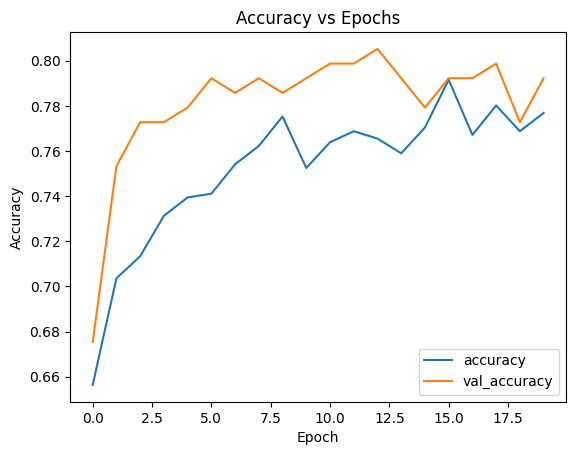

In [34]:
# Plot accuracy vs epochs
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs Epochs')
plt.show()

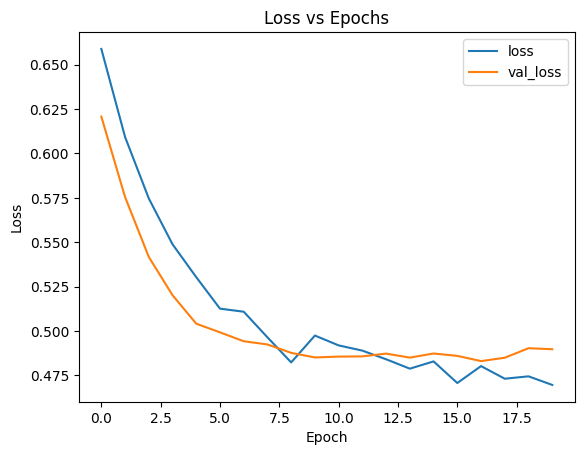

In [35]:
# Plot loss vs epochs
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss vs Epochs')
plt.show()

In [37]:

input_data = np.array([5, 166, 72, 19, 175, 25.8, 0.587, 51])  # Input data
input_data = scaler.transform(input_data.reshape(1, -1)).reshape(1, input_data.shape[0], 1)

# Make predictions
prediction = model.predict(input_data)

# Convert prediction probabilities to binary labels
predicted_label = 1 if prediction > 0.5 else 0

# Print the predicted label
if predicted_label == 1:
    print("The person is predicted to be diabetic.")
else:
    print("The person is predicted to be non-diabetic.")

1/1 [==============================] - 0s 35ms/step
The person is predicted to be diabetic.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
